In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

#그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
sample_submission = pd.read_csv('/content/drive/My Drive/project/sample_submission.csv', encoding='cp949')
test = pd.read_csv('/content/drive/My Drive/project/test.csv', encoding='cp949')
train = pd.read_csv('/content/drive/My Drive/project/train.csv', encoding='cp949')

In [ ]:
def eda(data):
    print("----------Top-5- Record----------")
    print(data.head(5))
    print("-----------Information-----------")
    print(data.info())
    print("-----------Data Types-----------")
    print(data.dtypes)
    print("----------Null value-----------")
    print(data.isna().sum())
    print("----------Shape of Data----------")
    print(data.shape)
    print("--------------Head---------------")
    print(data.head())

def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
eda(test)

----------Top-5- Record----------
   num      date_time  기온(°C)  ...  일조(hr, 3시간)  비전기냉방설비운영  태양광보유
0    1  2020-08-25 00    27.8  ...          0.0        NaN    NaN
1    1  2020-08-25 01     NaN  ...          NaN        NaN    NaN
2    1  2020-08-25 02     NaN  ...          NaN        NaN    NaN
3    1  2020-08-25 03    27.3  ...          0.0        NaN    NaN
4    1  2020-08-25 04     NaN  ...          NaN        NaN    NaN

[5 rows x 9 columns]
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
 7   비전기냉방설비운영     

{dtype('float64'), dtype('O'), dtype('int64')}


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


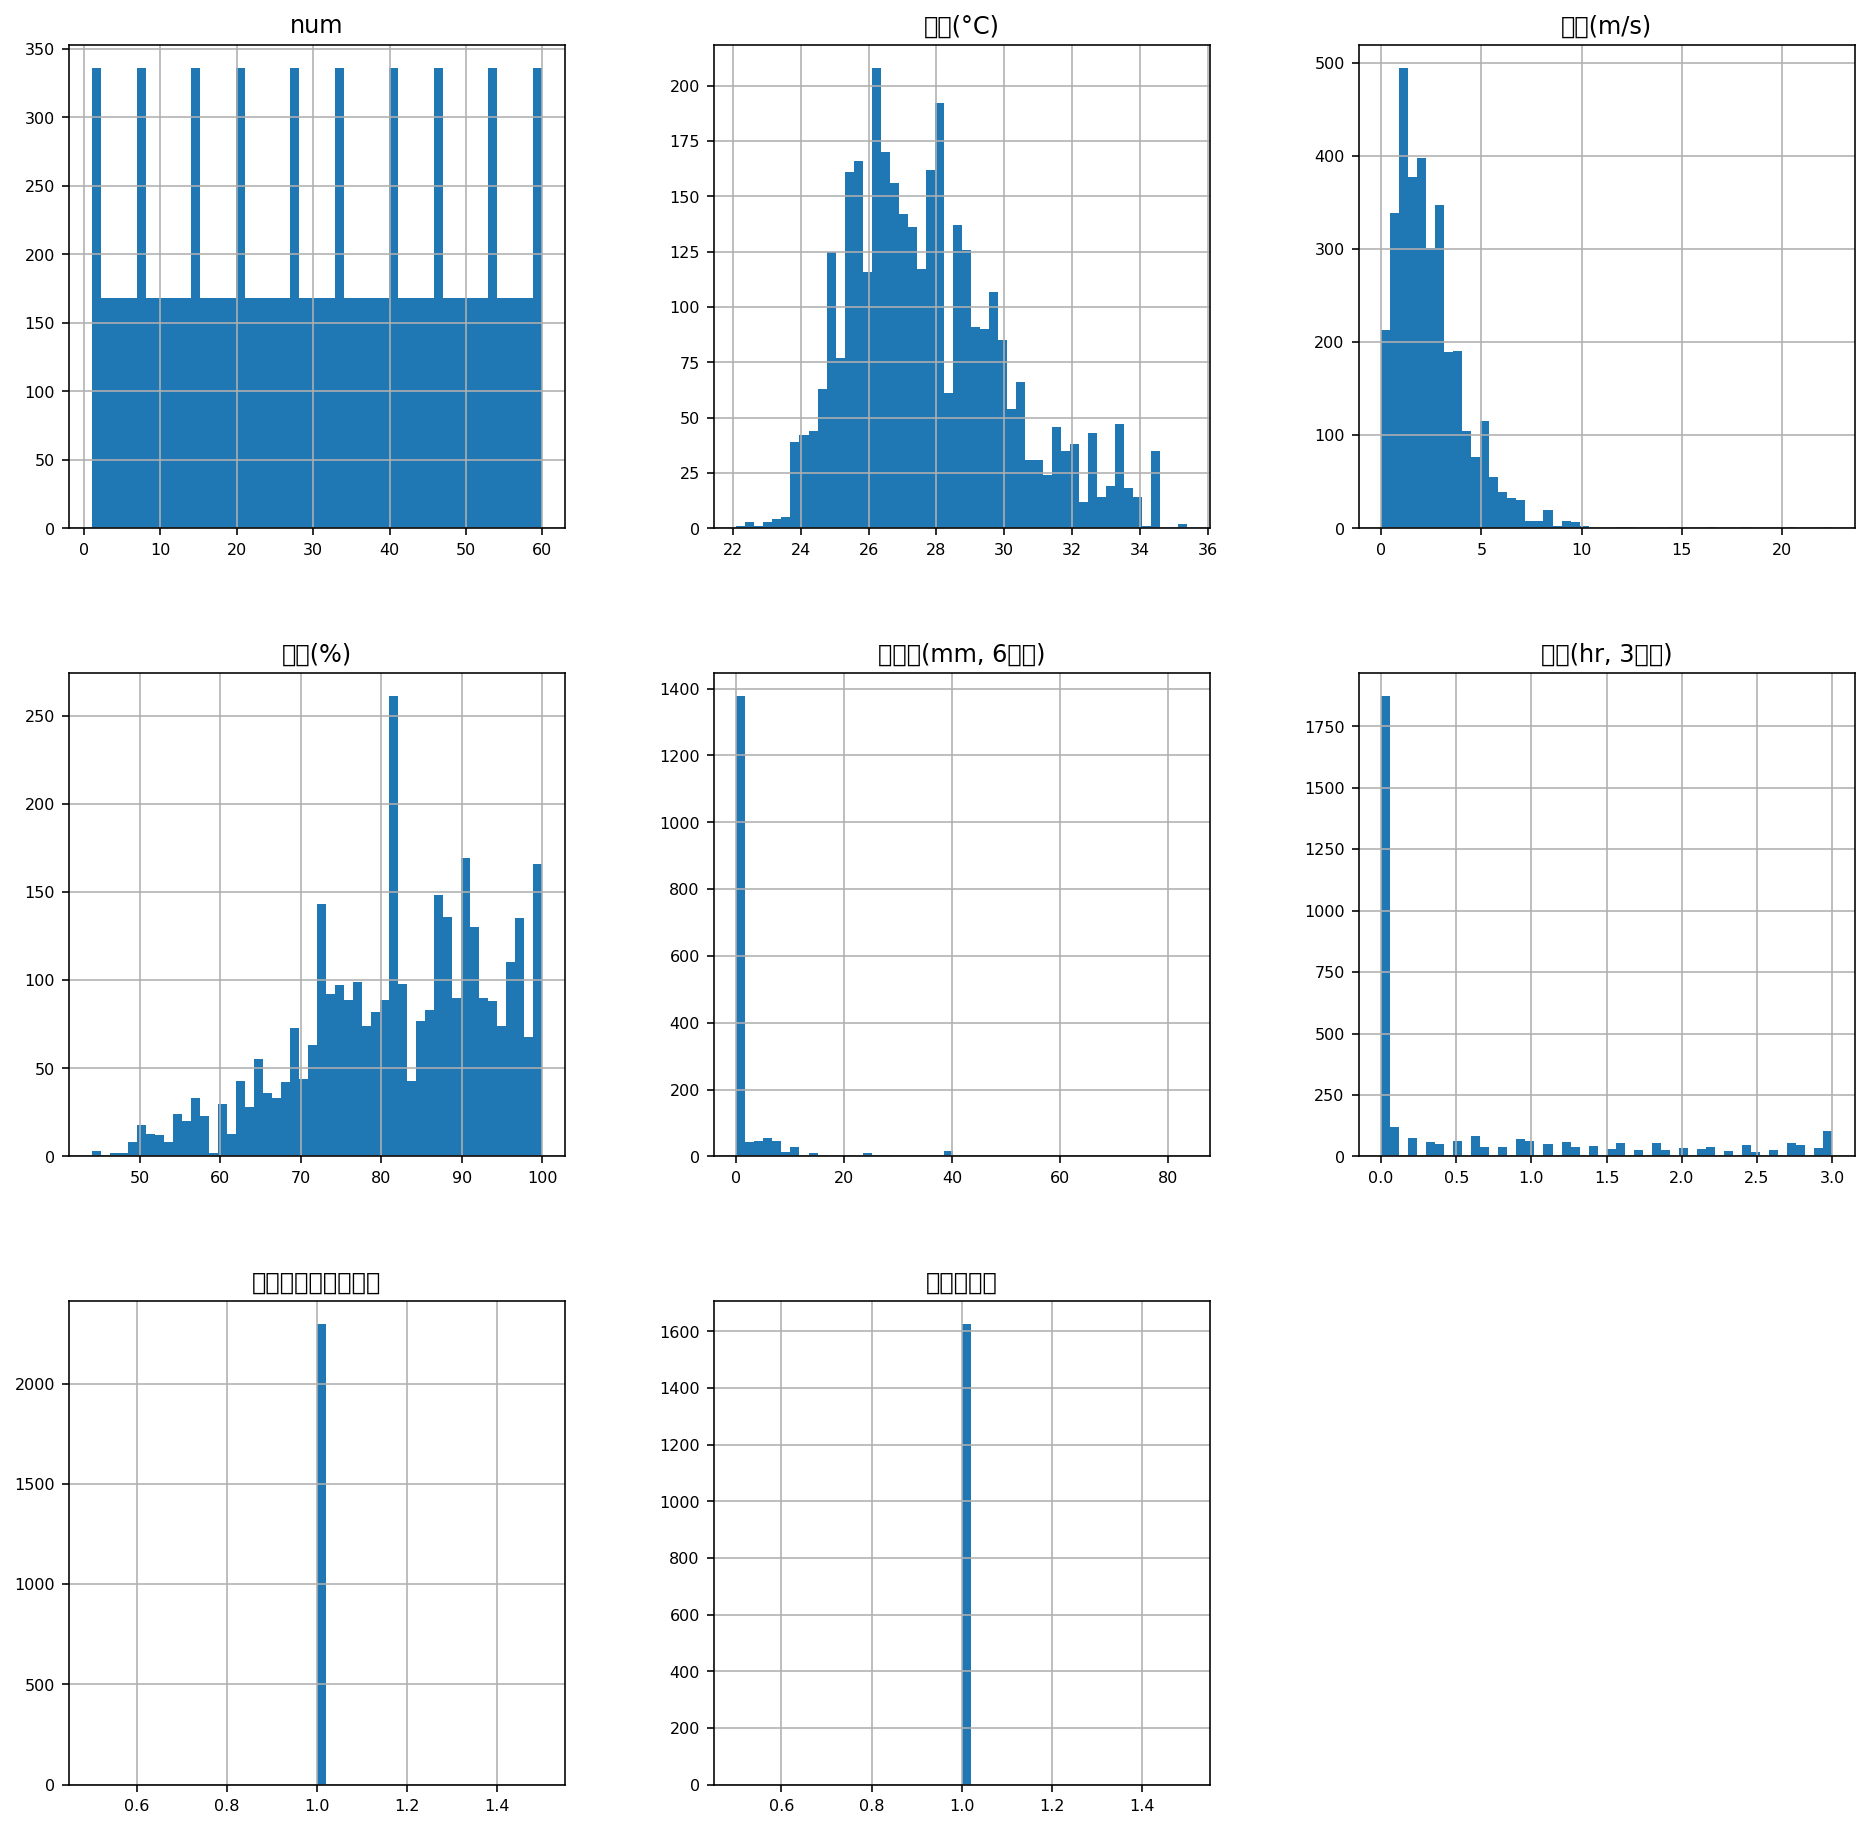

In [ ]:
graph_insight(test)

In [ ]:
eda(train)

----------Top-5- Record----------
   num      date_time  전력사용량(kWh)  기온(°C)  ...  강수량(mm)  일조(hr)  비전기냉방설비운영  태양광보유
0    1  2020-06-01 00    8179.056    17.6  ...      0.8     0.0        0.0    0.0
1    1  2020-06-01 01    8135.640    17.7  ...      0.3     0.0        0.0    0.0
2    1  2020-06-01 02    8107.128    17.5  ...      0.0     0.0        0.0    0.0
3    1  2020-06-01 03    8048.808    17.1  ...      0.0     0.0        0.0    0.0
4    1  2020-06-01 04    8043.624    17.0  ...      0.0     0.0        0.0    0.0

[5 rows x 10 columns]
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)  

{dtype('float64'), dtype('O'), dtype('int64')}


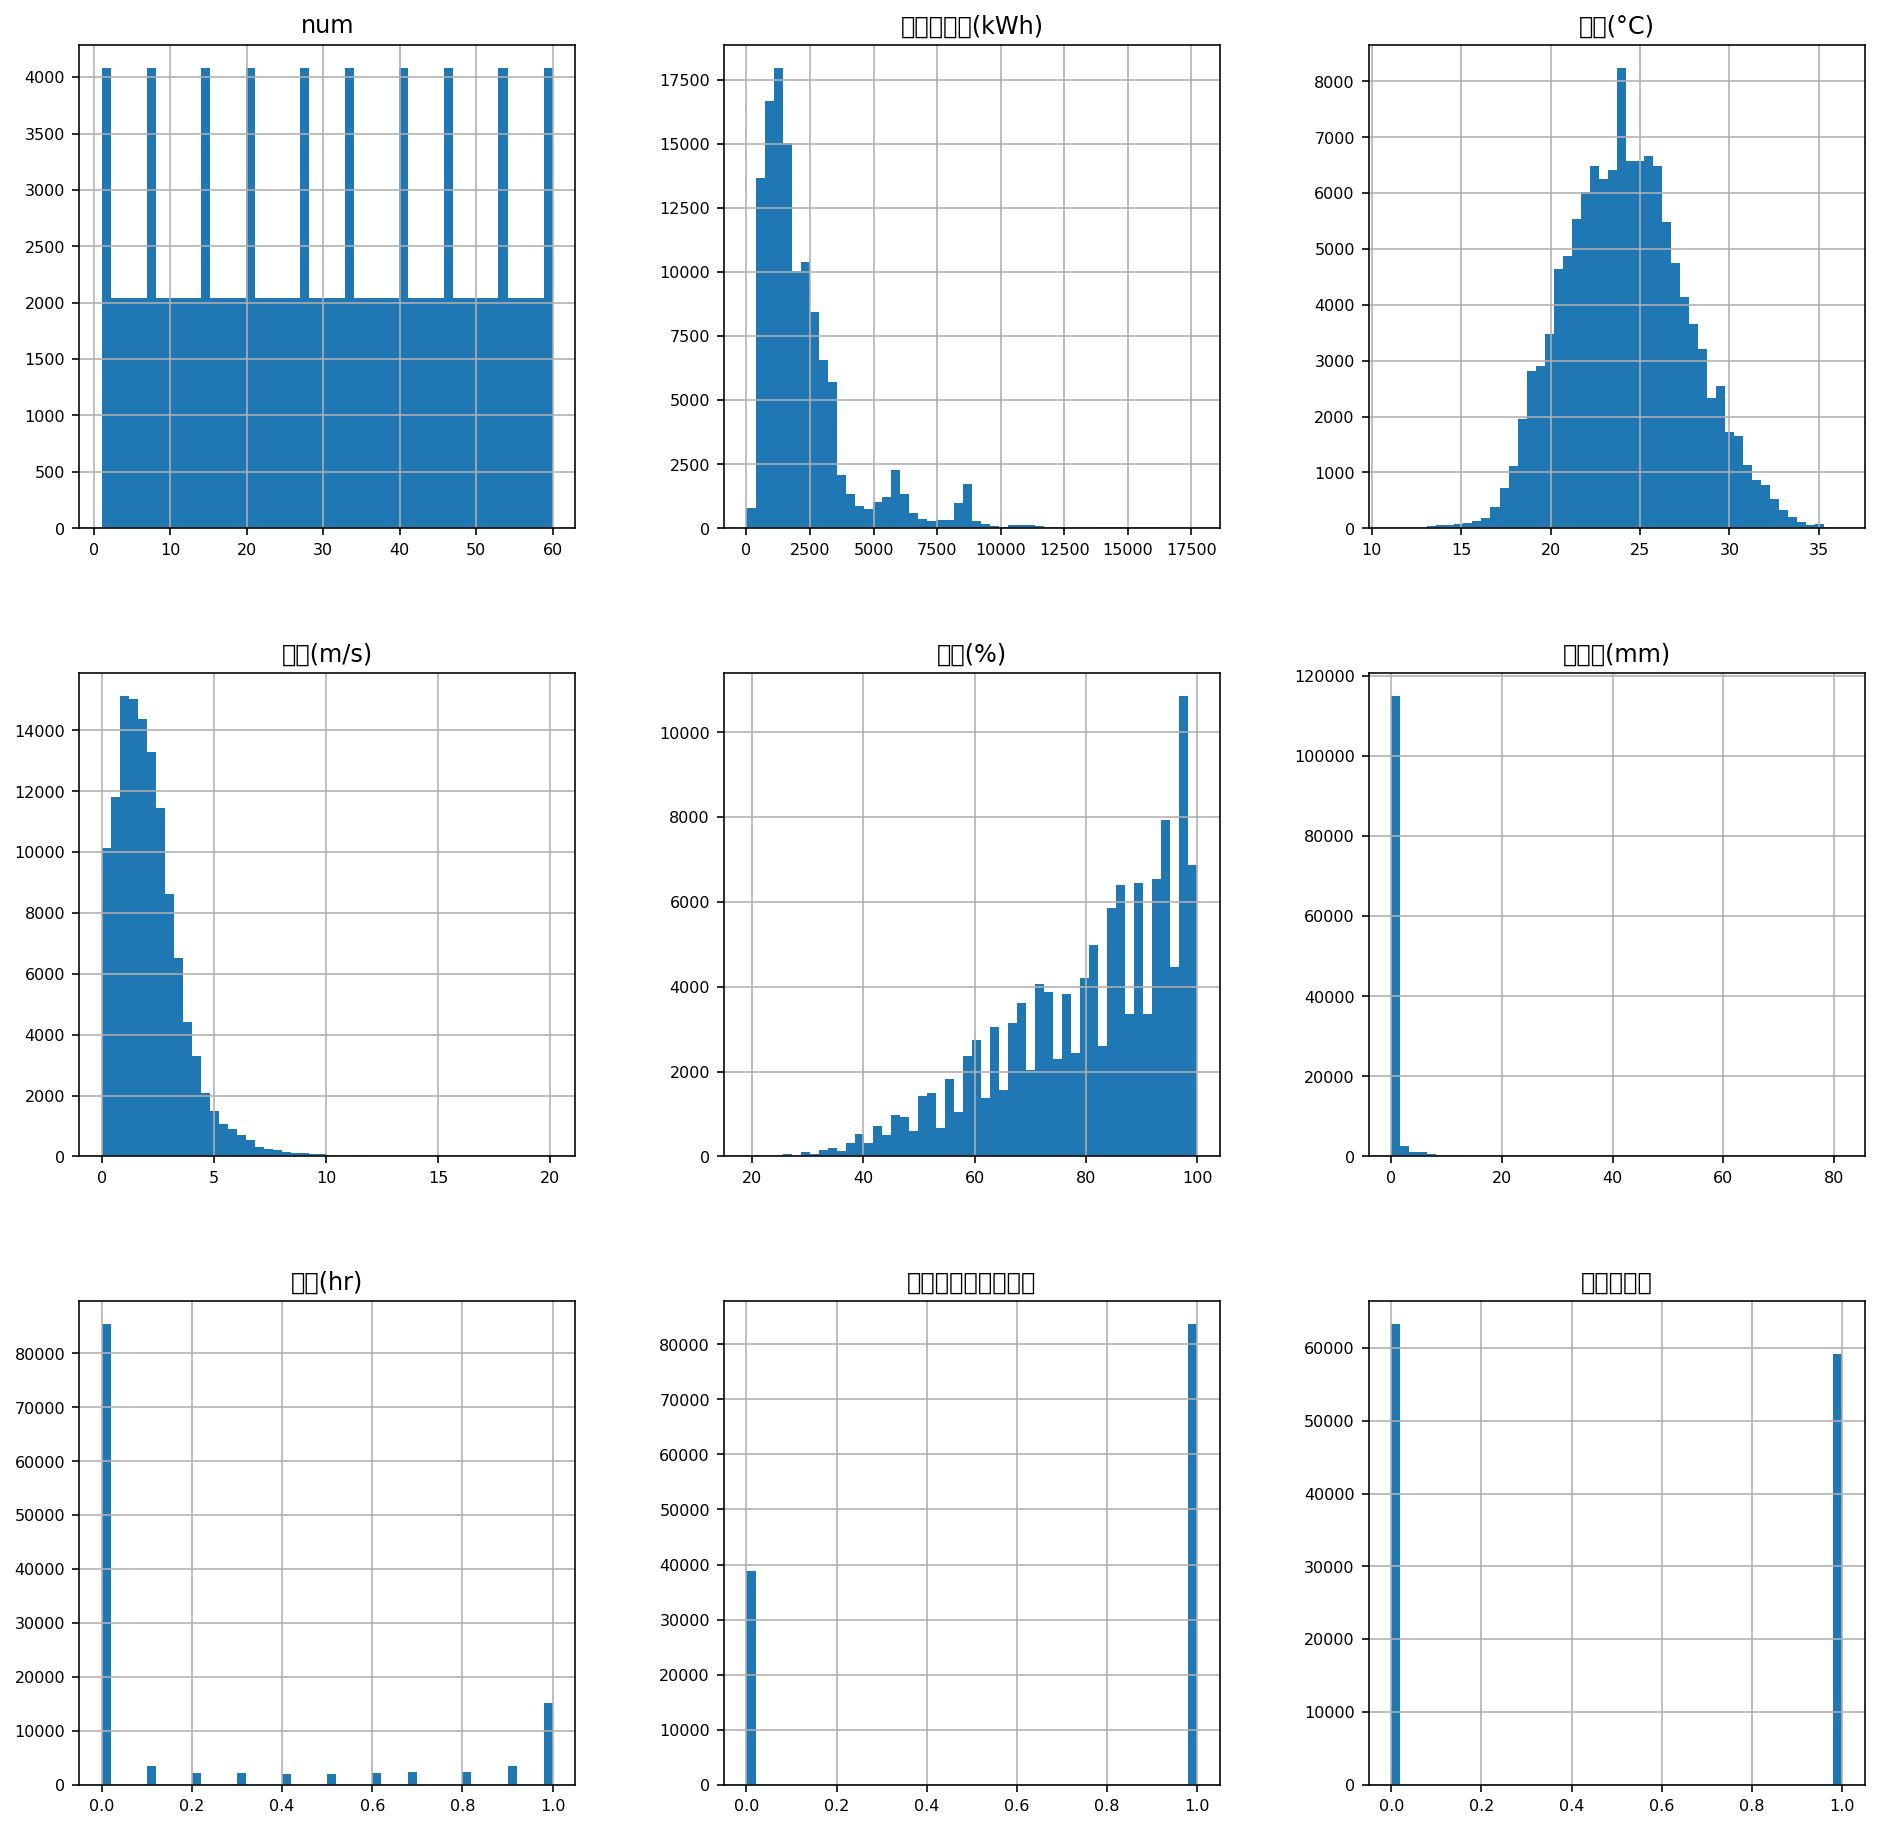

In [ ]:
graph_insight(train)

In [ ]:
train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유'],
      dtype='object')

In [ ]:
train['비전기냉방설비운영'].unique()

array([0., 1.])

In [ ]:
train['태양광보유'].unique()

array([0., 1.])

In [ ]:
test['비전기냉방설비운영'].unique()

array([nan,  1.])

In [ ]:
test['태양광보유'].unique()

array([nan,  1.])

In [ ]:
test['비전기냉방설비운영'].fillna(0, inplace=True)
test['태양광보유'].fillna(0, inplace=True)
test.isna().sum()

num                0
date_time          0
기온(°C)          6720
풍속(m/s)         6720
습도(%)           6720
강수량(mm, 6시간)    8400
일조(hr, 3시간)     6720
비전기냉방설비운영          0
태양광보유              0
dtype: int64

In [ ]:
test.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,0.0,0.0
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
test.fillna(method='ffill', inplace=True)
test.isna().sum()

num             0
date_time       0
기온(°C)          0
풍속(m/s)         0
습도(%)           0
강수량(mm, 6시간)    0
일조(hr, 3시간)     0
비전기냉방설비운영       0
태양광보유           0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        10080 non-null  float64
 3   풍속(m/s)       10080 non-null  float64
 4   습도(%)         10080 non-null  float64
 5   강수량(mm, 6시간)  10080 non-null  float64
 6   일조(hr, 3시간)   10080 non-null  float64
 7   비전기냉방설비운영     10080 non-null  float64
 8   태양광보유         10080 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


In [ ]:
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1,2020-08-25 01,27.8,1.5,74.0,0.0,0.0,0.0,0.0
2,1,2020-08-25 02,27.8,1.5,74.0,0.0,0.0,0.0,0.0
3,1,2020-08-25 03,27.3,1.1,78.0,0.0,0.0,0.0,0.0
4,1,2020-08-25 04,27.3,1.1,78.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,29.0,3.3,65.0,0.0,0.8,0.0,0.0
10076,60,2020-08-31 20,29.0,3.3,65.0,0.0,0.8,0.0,0.0
10077,60,2020-08-31 21,27.9,4.1,68.0,0.0,0.0,1.0,1.0
10078,60,2020-08-31 22,27.9,4.1,68.0,0.0,0.0,0.0,0.0


In [ ]:
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
test['전력사용량(kWh)'] = 0
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,전력사용량(kWh)
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0
1,1,2020-08-25 01,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0
2,1,2020-08-25 02,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0
3,1,2020-08-25 03,27.3,1.1,78.0,0.0,0.0,0.0,0.0,0
4,1,2020-08-25 04,27.3,1.1,78.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,29.0,3.3,65.0,0.0,0.8,0.0,0.0,0
10076,60,2020-08-31 20,29.0,3.3,65.0,0.0,0.8,0.0,0.0,0
10077,60,2020-08-31 21,27.9,4.1,68.0,0.0,0.0,1.0,1.0,0
10078,60,2020-08-31 22,27.9,4.1,68.0,0.0,0.0,0.0,0.0,0


In [ ]:
sample_submission

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


In [ ]:
train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유'],
      dtype='object')

In [ ]:
train.rename(columns={'전력사용량(kWh)': 'answer'}, inplace=True)
test.rename(columns={'전력사용량(kWh)': 'answer'}, inplace=True)
train

,num,date_time,answer,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
test.rename(columns={'강수량(mm, 6시간)':'강수량(mm)', '일조(hr, 3시간)':'일조(hr)'}, inplace=True)
test

,num,date_time,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,answer
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0
1,1,2020-08-25 01,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0
2,1,2020-08-25 02,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0
3,1,2020-08-25 03,27.3,1.1,78.0,0.0,0.0,0.0,0.0,0
4,1,2020-08-25 04,27.3,1.1,78.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,29.0,3.3,65.0,0.0,0.8,0.0,0.0,0
10076,60,2020-08-31 20,29.0,3.3,65.0,0.0,0.8,0.0,0.0,0
10077,60,2020-08-31 21,27.9,4.1,68.0,0.0,0.0,1.0,1.0,0
10078,60,2020-08-31 22,27.9,4.1,68.0,0.0,0.0,0.0,0.0,0


In [ ]:
y = train['answer']
y

0         8179.056
1         8135.640
2         8107.128
3         8048.808
4         8043.624
            ...   
122395    4114.368
122396    3975.696
122397    3572.208
122398    3299.184
122399    3204.576
Name: answer, Length: 122400, dtype: float64

In [ ]:
#train = train[['num', 'date_time', 'answer', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)',
               #'일조(hr)', '비전기냉방설비운영', '태양광보유']]
#test = test[['num', 'date_time', 'answer', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)',
             #'일조(hr)', '비전기냉방설비운영', '태양광보유']]

In [ ]:
train

,num,date_time,answer,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
test

,num,date_time,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,answer
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0
1,1,2020-08-25 01,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0
2,1,2020-08-25 02,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0
3,1,2020-08-25 03,27.3,1.1,78.0,0.0,0.0,0.0,0.0,0
4,1,2020-08-25 04,27.3,1.1,78.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,29.0,3.3,65.0,0.0,0.8,0.0,0.0,0
10076,60,2020-08-31 20,29.0,3.3,65.0,0.0,0.8,0.0,0.0,0
10077,60,2020-08-31 21,27.9,4.1,68.0,0.0,0.0,1.0,1.0,0
10078,60,2020-08-31 22,27.9,4.1,68.0,0.0,0.0,0.0,0.0,0


In [ ]:
test['num'].dtypes

dtype('int64')

In [ ]:
test['date_time'].dtypes

dtype('O')

In [ ]:
train['num'].dtypes

dtype('int64')

In [ ]:
train['date_time'].dtypes

dtype('O')

In [ ]:
train

,num,date_time,answer,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
test['num'] = test['num'].astype(str)
#test['date_time'] = test['date_time'].astype(str)
train['num'] = train['num'].astype(str)
#train['date_time'] = train['date_time'].astype(str)

In [ ]:
test

,num,date_time,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,answer
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0
1,1,2020-08-25 01,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0
2,1,2020-08-25 02,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0
3,1,2020-08-25 03,27.3,1.1,78.0,0.0,0.0,0.0,0.0,0
4,1,2020-08-25 04,27.3,1.1,78.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,29.0,3.3,65.0,0.0,0.8,0.0,0.0,0
10076,60,2020-08-31 20,29.0,3.3,65.0,0.0,0.8,0.0,0.0,0
10077,60,2020-08-31 21,27.9,4.1,68.0,0.0,0.0,1.0,1.0,0
10078,60,2020-08-31 22,27.9,4.1,68.0,0.0,0.0,0.0,0.0,0


In [ ]:
train

,num,date_time,answer,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
test['num_date_time'] = test['num'] + " " + test['date_time']
train['num_date_time'] = train['num'] + " " + train['date_time']

In [ ]:
test

,num,date_time,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,answer,num_date_time
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0,1 2020-08-25 00
1,1,2020-08-25 01,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0,1 2020-08-25 01
2,1,2020-08-25 02,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0,1 2020-08-25 02
3,1,2020-08-25 03,27.3,1.1,78.0,0.0,0.0,0.0,0.0,0,1 2020-08-25 03
4,1,2020-08-25 04,27.3,1.1,78.0,0.0,0.0,0.0,0.0,0,1 2020-08-25 04
...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,29.0,3.3,65.0,0.0,0.8,0.0,0.0,0,60 2020-08-31 19
10076,60,2020-08-31 20,29.0,3.3,65.0,0.0,0.8,0.0,0.0,0,60 2020-08-31 20
10077,60,2020-08-31 21,27.9,4.1,68.0,0.0,0.0,1.0,1.0,0,60 2020-08-31 21
10078,60,2020-08-31 22,27.9,4.1,68.0,0.0,0.0,0.0,0.0,0,60 2020-08-31 22


In [ ]:
train

,num,date_time,answer,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,num_date_time
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,1 2020-06-01 00
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1 2020-06-01 01
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,1 2020-06-01 02
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,1 2020-06-01 03
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,1 2020-06-01 04
...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,60 2020-08-24 19
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,60 2020-08-24 20
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,60 2020-08-24 21
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,60 2020-08-24 22


In [ ]:
train.drop(['num','date_time'], axis=1, inplace=True)
test.drop(['num','date_time'], axis=1, inplace=True)

In [ ]:
sample_submission.dtypes

num_date_time    object
answer            int64
dtype: object

In [ ]:
train.dtypes

answer           float64
기온(°C)           float64
풍속(m/s)          float64
습도(%)            float64
강수량(mm)          float64
일조(hr)           float64
비전기냉방설비운영        float64
태양광보유            float64
num_date_time     object
dtype: object

In [ ]:
test.dtypes

기온(°C)           float64
풍속(m/s)          float64
습도(%)            float64
강수량(mm)          float64
일조(hr)           float64
비전기냉방설비운영        float64
태양광보유            float64
answer             int64
num_date_time     object
dtype: object

In [ ]:
test['answer'] = test['answer'].astype(float)
test.dtypes

기온(°C)           float64
풍속(m/s)          float64
습도(%)            float64
강수량(mm)          float64
일조(hr)           float64
비전기냉방설비운영        float64
태양광보유            float64
answer           float64
num_date_time     object
dtype: object

In [ ]:
df_train = train[['num_date_time', 'answer', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)','일조(hr)', '비전기냉방설비운영', '태양광보유']]
df_test = test[['num_date_time', 'answer', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)','일조(hr)', '비전기냉방설비운영', '태양광보유']]

In [ ]:
df_train

,num_date_time,answer,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1 2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1 2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1 2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1 2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1 2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
122395,60 2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60 2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60 2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60 2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
df_test

,num_date_time,answer,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1 2020-08-25 00,0.0,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1 2020-08-25 01,0.0,27.8,1.5,74.0,0.0,0.0,0.0,0.0
2,1 2020-08-25 02,0.0,27.8,1.5,74.0,0.0,0.0,0.0,0.0
3,1 2020-08-25 03,0.0,27.3,1.1,78.0,0.0,0.0,0.0,0.0
4,1 2020-08-25 04,0.0,27.3,1.1,78.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60 2020-08-31 19,0.0,29.0,3.3,65.0,0.0,0.8,0.0,0.0
10076,60 2020-08-31 20,0.0,29.0,3.3,65.0,0.0,0.8,0.0,0.0
10077,60 2020-08-31 21,0.0,27.9,4.1,68.0,0.0,0.0,1.0,1.0
10078,60 2020-08-31 22,0.0,27.9,4.1,68.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.columns

Index(['num_date_time', 'answer', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)',
       '일조(hr)', '비전기냉방설비운영', '태양광보유'],
      dtype='object')

In [ ]:
df_train.dtypes

num_date_time     object
answer           float64
기온(°C)           float64
풍속(m/s)          float64
습도(%)            float64
강수량(mm)          float64
일조(hr)           float64
비전기냉방설비운영        float64
태양광보유            float64
dtype: object

In [ ]:
#temp = df_train.groupby(['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)','일조(hr)', '비전기냉방설비운영', '태양광보유'])['answer', 'num_date_time'].size()

In [ ]:
#temp.keys()

In [ ]:
#df2 = pd.DataFrame(data=temp.keys().tolist(), columns=['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)','일조(hr)', '비전기냉방설비운영', '태양광보유'])

In [ ]:
#df2

In [ ]:
#df2['answer'] = df_train['answer']
#df2

In [ ]:
df_train

,num_date_time,answer,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1 2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1 2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1 2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1 2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1 2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
122395,60 2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60 2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60 2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60 2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
df_test

,num_date_time,answer,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1 2020-08-25 00,0.0,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1 2020-08-25 01,0.0,27.8,1.5,74.0,0.0,0.0,0.0,0.0
2,1 2020-08-25 02,0.0,27.8,1.5,74.0,0.0,0.0,0.0,0.0
3,1 2020-08-25 03,0.0,27.3,1.1,78.0,0.0,0.0,0.0,0.0
4,1 2020-08-25 04,0.0,27.3,1.1,78.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60 2020-08-31 19,0.0,29.0,3.3,65.0,0.0,0.8,0.0,0.0
10076,60 2020-08-31 20,0.0,29.0,3.3,65.0,0.0,0.8,0.0,0.0
10077,60 2020-08-31 21,0.0,27.9,4.1,68.0,0.0,0.0,1.0,1.0
10078,60 2020-08-31 22,0.0,27.9,4.1,68.0,0.0,0.0,0.0,0.0


In [ ]:
sample_submission

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


In [ ]:
new_df = pd.concat([df_train,df_test])
new_df = new_df.drop('num_date_time', axis=1)
X = new_df.iloc[:122400, :].drop('answer', axis=1)
sub = new_df.iloc[122400:, :].drop('answer', axis=1)

In [ ]:
X

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
122395,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
sub

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,27.8,1.5,74.0,0.0,0.0,0.0,0.0
2,27.8,1.5,74.0,0.0,0.0,0.0,0.0
3,27.3,1.1,78.0,0.0,0.0,0.0,0.0
4,27.3,1.1,78.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
10075,29.0,3.3,65.0,0.0,0.8,0.0,0.0
10076,29.0,3.3,65.0,0.0,0.8,0.0,0.0
10077,27.9,4.1,68.0,0.0,0.0,1.0,1.0
10078,27.9,4.1,68.0,0.0,0.0,0.0,0.0


In [ ]:
y

0         8179.056
1         8135.640
2         8107.128
3         8048.808
4         8043.624
            ...   
122395    4114.368
122396    3975.696
122397    3572.208
122398    3299.184
122399    3204.576
Name: answer, Length: 122400, dtype: float64

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
from os.path import join
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)
models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},{'model':lightgbm, 'name':'LightGBM'}]

In [ ]:
def get_cv_score(models):
  kfold = KFold(n_splits=5, random_state=2019).get_n_splits(X.values)
  for m in models:
    print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], X.values, y)),kf=kfold))

In [ ]:
def AveragingBlending(models, x, y, sub_x):
  for m in models :
    m['model'].fit(x.values, y)
  predictions = np.column_stack([
    m['model'].predict(sub_x.values) for m in models
  ])
  return np.mean(predictions, axis=1)

In [ ]:
# 함수 활용, 예측값 생성
y_pred = AveragingBlending(models, X, y, sub)
print(len(y_pred))
y_pred

[22:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
10080


array([2392.8841893 , 2392.8841893 , 2392.8841893 , ..., 2912.13600935,
       2553.00789029, 2553.00789029])

In [ ]:
sample_submission['answer'] = y_pred
sample_submission

,num_date_time,answer
0,1 2020-08-25 00,2392.884189
1,1 2020-08-25 01,2392.884189
2,1 2020-08-25 02,2392.884189
3,1 2020-08-25 03,2228.566893
4,1 2020-08-25 04,2228.566893
...,...,...
10075,60 2020-08-31 19,2684.835193
10076,60 2020-08-31 20,2684.835193
10077,60 2020-08-31 21,2912.136009
10078,60 2020-08-31 22,2553.007890


In [ ]:
sub_title = sample_submission.set_index('num_date_time')
sub_title

,answer
num_date_time,
1 2020-08-25 00,2392.884189
1 2020-08-25 01,2392.884189
1 2020-08-25 02,2392.884189
1 2020-08-25 03,2228.566893
1 2020-08-25 04,2228.566893
...,...
60 2020-08-31 19,2684.835193
60 2020-08-31 20,2684.835193
60 2020-08-31 21,2912.136009


In [ ]:
sub_title.to_csv('/content/drive/My Drive/project/sub_title.csv', encoding='UTF-8')

In [ ]:
fine = pd.read_csv('/content/drive/My Drive/project/sub_title.csv', encoding='UTF-8')
fine

,num_date_time,answer
0,1 2020-08-25 00,2392.884189
1,1 2020-08-25 01,2392.884189
2,1 2020-08-25 02,2392.884189
3,1 2020-08-25 03,2228.566893
4,1 2020-08-25 04,2228.566893
...,...,...
10075,60 2020-08-31 19,2684.835193
10076,60 2020-08-31 20,2684.835193
10077,60 2020-08-31 21,2912.136009
10078,60 2020-08-31 22,2553.007890


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


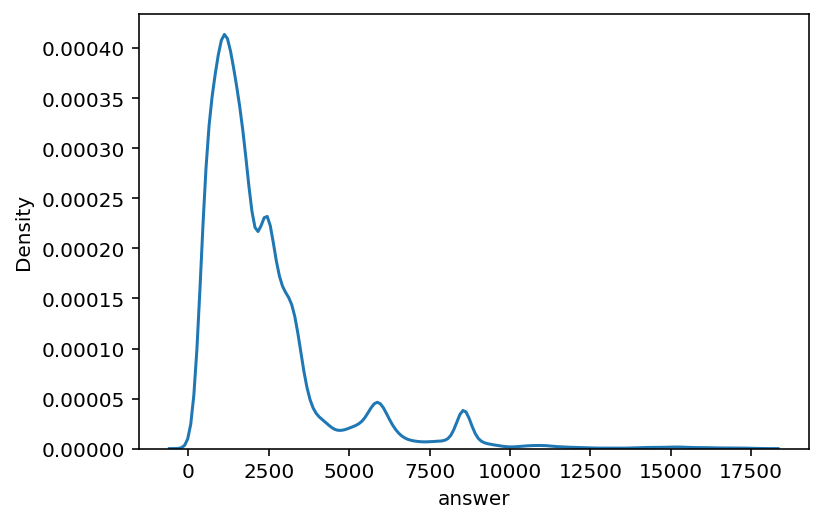

In [ ]:
sns.kdeplot(y)
plt.show()

In [ ]:
y = np.log1p(y)
y


0         9.009454
1         9.004133
2         9.000622
3         8.993404
4         8.992759
            ...   
122395    8.322484
122396    8.288207
122397    8.181219
122398    8.101734
122399    8.072647
Name: answer, Length: 122400, dtype: float64

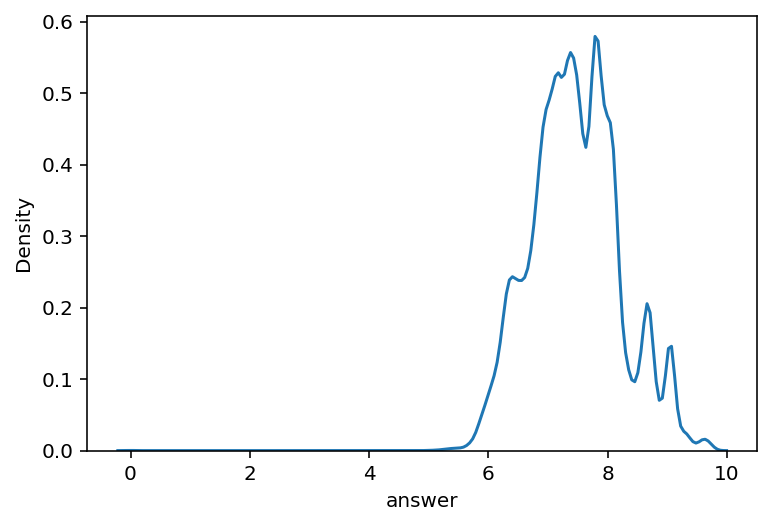

In [ ]:
sns.kdeplot(y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [ ]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다.
#random_state=None # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.
random_state=2020 # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다.
gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)
models = [gboost, xgboost, lightgbm, rdforest]

In [ ]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [ ]:
df = {}
for model in models:
  # 모델 이름 획득
  model_name = model.__class__.__name__
  # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다.
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=0.2)
  # 모델 학습
  model.fit(X_train, y_train)
  # 예측
  y_pred = model.predict(X_test)
  # 예측 결과의 rmse값 저장
  df[model_name] = rmse(y_test, y_pred)
  # data frame에 저장
  score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
df


[22:22:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'GradientBoostingRegressor': 2029.1430698986271,
 'LGBMRegressor': 2009.917803986484,
 'RandomForestRegressor': 2137.0847634342176,
 'XGBRegressor': 2029.1333970672802}

In [ ]:
def get_scores(models, train, y):
# 답안 작성
  get_scores(models, train, y)

def get_scores(models, train, y):
  df = {}
  for model in models:
    model_name = model.__class__.__name__
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df[model_name] = rmse(y_test, y_pred)
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
  return score_df


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
    }


In [ ]:
model = LGBMRegressor(random_state=random_state)

In [ ]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                          scoring='neg_mean_squared_error', \
                          cv=5, verbose=1, n_jobs=5)
grid_model.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    8.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=2020,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_s

In [ ]:
grid_model.cv_results_

{'mean_fit_time': array([0.61244998, 0.94140849, 1.33029561, 2.03170009]),
 'mean_score_time': array([0.08072324, 0.14138832, 0.16275711, 0.21235175]),
 'mean_test_score': array([-0.51971774, -0.51749218, -0.54274879, -0.54588294]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'rank_test_score': array([2, 1, 3, 4], dtype=int32),
 'split0_test_score': array([-0.9286871 , -0.94138751, -0.96885877, -0.97207448]),
 'split1_test_score': array([-0.22559277, -0.22082661, -0.22854531, -0.23002559]),
 'split2_test_score': array([-0.61565782, -0.62183743, 

In [ ]:
params = grid_model.cv_results_['params']
params


[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [ ]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.51971774, -0.51749218, -0.54274879, -0.54588294])

In [ ]:
results = pd.DataFrame(params)
results['score'] = score
results


,max_depth,n_estimators,score
0,1,50,-0.519718
1,1,100,-0.517492
2,10,50,-0.542749
3,10,100,-0.545883


In [ ]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results


,max_depth,n_estimators,score,RMSE
0,1,50,-0.519718,0.720915
1,1,100,-0.517492,0.719369
2,10,50,-0.542749,0.736715
3,10,100,-0.545883,0.738839


In [ ]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,max_depth,n_estimators,score,RMSLE
0,1,50,-0.519718,0.720915
1,1,100,-0.517492,0.719369
2,10,50,-0.542749,0.736715
3,10,100,-0.545883,0.738839


In [ ]:
results = results.sort_values('RMSLE')
results

,max_depth,n_estimators,score,RMSLE
1,1,100,-0.517492,0.719369
0,1,50,-0.519718,0.720915
2,10,50,-0.542749,0.736715
3,10,100,-0.545883,0.738839


In [ ]:
"""
다음과 같은 과정을 진행할 수 있는 `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` 함수를 구현해 보세요.
1. GridSearchCV 모델로 `model`을 초기화합니다.
2. 모델을 fitting 합니다.
3. params, score에 각 조합에 대한 결과를 저장합니다.
4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.
"""
# 코드 입력
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
  # GridSearchCV 모델로 초기화
  grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                            cv=5, verbose=verbose, n_jobs=n_jobs)
  # 모델 fitting
  grid_model.fit(train, y)
  # 결과값 저장
  params = grid_model.cv_results_['params']
  score = grid_model.cv_results_['mean_test_score']
  # 데이터 프레임 생성
  results = pd.DataFrame(params)
  results['score'] = score
  # RMSLE 값 계산 후 정렬
  results['RMSLE'] = np.sqrt(-1 * results['score'])
  results = results.sort_values('RMSLE')
  return results


In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
    }
model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, X, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    5.8s finished


,max_depth,n_estimators,score,RMSLE
1,1,100,-0.517492,0.719369
0,1,50,-0.519718,0.720915
2,10,50,-0.542749,0.736715
3,10,100,-0.545883,0.738839


In [ ]:
test = test.drop(['answer','num_date_time'], axis=1)

In [ ]:
X

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
122395,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(X, y)
prediction = model.predict(test)
prediction

array([7.50790483, 7.50790483, 7.50790483, ..., 7.64191614, 7.5988829 ,
       7.5988829 ])

In [ ]:
prediction = np.expm1(prediction)
prediction


array([1821.39132674, 1821.39132674, 1821.39132674, ..., 2082.73272088,
       1994.96496334, 1994.96496334])

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/project/sub_title.csv', encoding='UTF-8')
submission_path = '/content/drive/My Drive/project'
submission.head()


,num_date_time,answer
0,1 2020-08-25 00,2392.884189
1,1 2020-08-25 01,2392.884189
2,1 2020-08-25 02,2392.884189
3,1 2020-08-25 03,2228.566893
4,1 2020-08-25 04,2228.566893


In [ ]:
submission['answer'] = prediction
submission.head()

,num_date_time,answer
0,1 2020-08-25 00,1821.391327
1,1 2020-08-25 01,1821.391327
2,1 2020-08-25 02,1821.391327
3,1 2020-08-25 03,1686.332035
4,1 2020-08-25 04,1686.332035


In [ ]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(submission_path, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)


/content/drive/My Drive/project/submission_lgbm_RMSLE_0.164399.csv


In [ ]:
"""
아래의 과정을 수행하는 `save_submission(model, train, y, test, model_name, rmsle)` 함수를 구현해 주세요.
1. 모델을 `train`, `y`로 학습시킵니다.
2. `test`에 대해 예측합니다.
3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장합니다.
"""
# 코드 작성
def save_submission(model, train, y, test, model_name, rmsle=None):
  model.fit(train, y)
  prediction = model.predict(test)
  prediction = np.expm1(prediction)
  submission = pd.read_csv(submission_path)
  submission['answer'] = prediction
  submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format('submission', model_name, rmsle)
  submission.to_csv(submission_csv_path, index=False)
  print('{} saved!'.format(submission_csv_path))

In [ ]:
final_submission_file = pd.read_csv('/content/drive/My Drive/project/submission_lgbm_RMSLE_0.164399.csv')
final_submission_file

,num_date_time,answer
0,1 2020-08-25 00,2392.884189
1,1 2020-08-25 01,2392.884189
2,1 2020-08-25 02,2392.884189
3,1 2020-08-25 03,2228.566893
4,1 2020-08-25 04,2228.566893
...,...,...
10075,60 2020-08-31 19,2684.835193
10076,60 2020-08-31 20,2684.835193
10077,60 2020-08-31 21,2912.136009
10078,60 2020-08-31 22,2553.007890
